In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import decimal

## Using same values for variables from K=2,

In [2]:
# service rate
mu = 3

# total time, that is the office our is from 8:00 am to 6:00 pm, and will not accept new customers half hour before the end
T = 10
# time for the change in influx
t0 = 5

# let's consider the case when a new gate is open at time s, i.e. there are two counter serving
s = 6

## We now consider Waiting Time in Queue with respect to change in Lambda1

In [3]:
def float_range(start,stop,step):
    while start<stop:
        yield float(start)
        start+= decimal.Decimal(step)

In [4]:
arrivalrate1=list(float_range(1,3,'0.2'))
Wq_sr=[]
Wq_s1_sr=[]

In [5]:
for i in arrivalrate1:
    lambda1 = i
    lambda2 = 4
    arrival_rate = np.array([lambda1,lambda2])

    # For a single iteration of simulation
    arrival_time=np.zeros([50,1])
    # assign value of arrival time
    n=0
    while arrival_time[n]<10:
        if n==0:
            arrival_time[0]=np.random.exponential(1/lambda1)
            
        if arrival_time[n]<t0:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda1)
        else:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda2)
        n+=1
    
    arrival_time=arrival_time[arrival_time>0][0:n,None]
    
    # service length
    service_length=np.random.exponential(1/mu,[n,1])
    
    # service starting time & service ending time
    # let's start with only one gate
    service_star_time=np.zeros([n,1])
    service_end_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_star_time[k]=arrival_time[k]
        else:
            service_star_time[k]=max(arrival_time[k],service_end_time[k-1])
        service_end_time[k]=service_star_time[k]+service_length[k]
    
    # new service start and ending time with new gate introduced
    service_star_s_time=np.zeros([n,1])
    service_end_s_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_star_s_time[k]=arrival_time[k]
        else:
            service_star_s_time[k]=max(arrival_time[k],service_end_s_time[k-1])
        service_end_s_time[k]=service_star_s_time[k]+service_length[k]
        if  service_end_s_time[k]>=s:
            break
            
    service_star_s_time[k+1]=max(s,arrival_time[k+1])
    service_end_s_time[k+1]=service_star_s_time[k+1]+service_length[k+1]
    for j in range(k+2,n):
        service_star_s_time[j]=max(arrival_time[j],min(service_end_s_time[j-1],service_end_s_time[j-2]))
        service_end_s_time[j]=service_star_s_time[j]+service_length[j]
    
    # waiting time given the gate is opened at time s
    waiting_s_time=service_star_s_time-arrival_time
    total_service_s_time=waiting_s_time+service_length
    Wq_s=np.sum(waiting_s_time)/len(waiting_s_time)
    Wq_s1_sr.append(Wq_s)
    
    waiting_time=service_star_time-arrival_time
    Wq=np.sum(waiting_time)/len(waiting_time)
    Wq_sr.append(Wq)

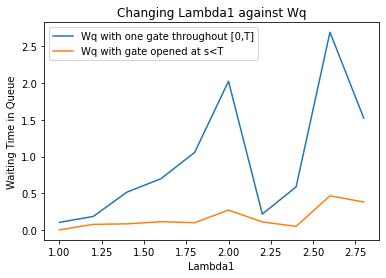

In [6]:
plt.plot(arrivalrate1,Wq_sr,label='Wq with one gate throughout [0,T]')
plt.plot(arrivalrate1,Wq_s1_sr,label='Wq with gate opened at s<T')
plt.xlabel('Lambda1')
plt.ylabel('Waiting Time in Queue')
plt.title('Changing Lambda1 against Wq')
plt.legend()
plt.show()